In [40]:
import pandas as pd
import numpy as np

class MarketProfile:
    def __init__(self,pricedata):
        self.__pricedata=pricedata
        
    def __getvaluearea(self,vapercent):
        totalcount=self.__pricedata['price'].count()
        #vapercent=68.5
        vacount=totalcount*vapercent/100
        counter=0


        pricecount = self.__pricedata.groupby(['price']).count()[['time']].sort_values('price')



        #print (pricecount)
        maxlocation=pricecount['time'].values.argmax()
        vafrom=maxlocation
        vato=maxlocation

        print(maxlocation)
        currlocation = maxlocation
        while counter < vacount:

            counter = counter + pricecount['time'].iloc[currlocation]
            print(counter)
            if maxlocation == 0 :
                currlocation = currlocation + 1
                vato=currlocation
            elif maxlocation == pricecount['time'].count()-1:
                currlocation = currlocation - 1
                vafrom=currlocation
            else:
                if vafrom == 0 :
                    currlocation = varto+1
                    varto = currlocation
                elif vato == pricecount['time'].count()-1:
                    currlocation = vafrom - 1
                    vafrom = currlocation
                else:
                    if pricecount['time'].iloc[vafrom-1] > pricecount['time'].iloc[vato+1] :
                        currlocation = vafrom-1
                        vafrom = currlocation
                    elif pricecount['time'].iloc[vafrom-1] < pricecount['time'].iloc[vato+1] : 
                        currlocation = vato +1
                        vato = currlocation
                    else:
                        if currlocation == vato:
                            currlocation = vafrom-1
                            vafrom = currlocation
                        else:
                            currlocation = vato+1
                            vato = currlocation


        self.__vastart = pricecount.index[vafrom]
        print ('vafrom', pricecount.index[vafrom])
        self.__vaend = pricecount.index[vato]
        print ('vato', pricecount.index[vato])

        
        
idData=pd.read_csv("2019 FEB NIFTY.txt",header=None,usecols=[1,2,3,4,5,6],parse_dates=[[1,2]],dtype={3:np.float64,4:np.float64,5:np.float64,6:np.float64})
 

In [2]:
idData.columns=['tradetime','open','high','low','close']


In [3]:
 idData['price'] =(idData['open']+idData['close'])/2

In [4]:
import datetime
d1=datetime.datetime(2019,2,28,0,0,0,0)
d2=datetime.datetime(2019,2,28,23,59,59,999)
onedaydata=idData.loc[(idData['tradetime'] > d1) & (idData['tradetime'] < d2)] 
onedaydata.index = onedaydata['tradetime']
fivemindata = onedaydata.resample('5T').mean().copy() 

 

In [5]:
fivemindata.reset_index()
fivemindata['time']= [   pd.Timestamp(x).to_pydatetime() for x in fivemindata.index.values]
fivemindata['price']=fivemindata['price'].map(lambda x: np.ceil(x))
fivemindata
 

,open,high,low,close,price,time
tradetime,,,,,,
2019-02-28 09:05:00,10865.700000,10865.700000,10865.700000,10865.700000,10866.0,2019-02-28 09:05:00
2019-02-28 09:10:00,NaN,NaN,NaN,NaN,NaN,2019-02-28 09:10:00
2019-02-28 09:15:00,10846.600000,10850.050000,10841.312500,10844.912500,10846.0,2019-02-28 09:15:00
2019-02-28 09:20:00,10839.480000,10841.790000,10835.660000,10838.070000,10839.0,2019-02-28 09:20:00
2019-02-28 09:25:00,10840.610000,10842.030000,10836.610000,10838.150000,10840.0,2019-02-28 09:25:00
2019-02-28 09:30:00,10825.070000,10827.070000,10821.870000,10823.950000,10825.0,2019-02-28 09:30:00
2019-02-28 09:35:00,10817.840000,10820.080000,10814.950000,10816.270000,10818.0,2019-02-28 09:35:00
2019-02-28 09:40:00,10807.620000,10811.660000,10803.950000,10808.980000,10809.0,2019-02-28 09:40:00
2019-02-28 09:45:00,10820.430000,10822.720000,10819.000000,10821.240000,10821.0,2019-02-28 09:45:00


In [43]:
    totalcount=fivemindata['price'].count()
    vapercent=50
    vacount=totalcount*vapercent/100
    counter=0


    pricecount = fivemindata.groupby(['price']).count()[['time']].sort_values('price')



    #print (pricecount)
    maxlocation=pricecount['time'].values.argmax()
    vafrom=maxlocation
    vato=maxlocation

    print(maxlocation)
    currlocation = maxlocation
    while counter < vacount:

        counter = counter + pricecount['time'].iloc[currlocation]
        print(counter)
        if maxlocation == 0 :
            currlocation = currlocation + 1
            vato=currlocation
        elif maxlocation == pricecount['time'].count()-1:
            currlocation = currlocation - 1
            vafrom=currlocation
        else:
            if vafrom == 0 :
                currlocation = varto+1
                varto = currlocation
            elif vato == pricecount['time'].count()-1:
                currlocation = vafrom - 1
                vafrom = currlocation
            else:
                if pricecount['time'].iloc[vafrom-1] > pricecount['time'].iloc[vato+1] :
                    currlocation = vafrom-1
                    vafrom = currlocation
                elif pricecount['time'].iloc[vafrom-1] < pricecount['time'].iloc[vato+1] : 
                    currlocation = vato +1
                    vato = currlocation
                else:
                    if currlocation == vato:
                        currlocation = vafrom-1
                        vafrom = currlocation
                    else:
                        currlocation = vato+1
                        vato = currlocation


    print ('vafrom', pricecount.index[vafrom])
    print ('vato', pricecount.index[vato])




28
7
12
16
18
20
23
26
28
29
32
34
36
39
vafrom 10823.0
vato 10840.0


In [30]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline


 

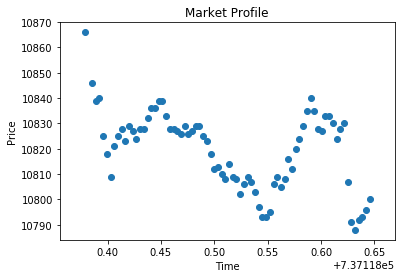

In [42]:
plt.scatter(matplotlib.dates.date2num(fivemindata.index) ,fivemindata['price'])
plt.title('Market Profile')
plt.xlabel('Time')
plt.ylabel('Price')
 
plt.show()